  Species  Weight  Length1  Length2  Length3   Height   Width
0   Bream   242.0     23.2     25.4     30.0  11.5200  4.0200
1   Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
2   Bream   340.0     23.9     26.5     31.1  12.3778  4.6961
3   Bream   363.0     26.3     29.0     33.5  12.7300  4.4555
4   Bream   430.0     26.5     29.0     34.0  12.4440  5.1340
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB
None
Mean Squared Error: 16763.88719314074
R² Score: 0.8821430593048695


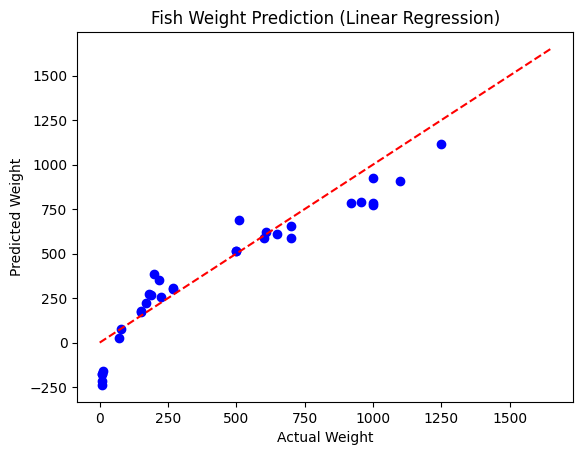

         Coefficient
Length1    43.535265
Length2     7.821796
Length3   -25.256701
Height     23.228912
Width      27.066493


In [1]:
# Step 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 2: Load dataset (download from Kaggle: "Fish Market Dataset")
df = pd.read_csv("Fish.csv")   # file name may vary, e.g., Fish.csv

# Step 3: Explore data
print(df.head())
print(df.info())

# Example columns: Species, Weight, Length1, Length2, Length3, Height, Width

# Step 4: Select features & target
X = df[['Length1', 'Length2', 'Length3', 'Height', 'Width']]
y = df['Weight']

# Step 5: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 7: Predictions
y_pred = model.predict(X_test)

# Step 8: Evaluate model
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

# Step 9: Visualize predictions vs actual
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel("Actual Weight")
plt.ylabel("Predicted Weight")
plt.title("Fish Weight Prediction (Linear Regression)")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # perfect prediction line
plt.show()

# Step 10: Check coefficients
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coeff_df)
